In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot  as plt 
import scipy.stats as sts
from pycaret.classification import *
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pickle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
import numpy as np
   



# **Dataset escolhido**
**Animal Crossing: New Horizons – Nintendo Switch**

# **Por que este dataset?**
O dataset foi escolhido por ser **bem documentado**, possuir **alta avaliação da comunidade** e contar com **diversas submissões**, o que demonstra qualidade e confiabilidade.  
Além disso, ele oferece **múltiplas possibilidades de análise**, permitindo explorar desde padrões de jogabilidade até preferências de personagens, itens e eventos do jogo.

# **Objetivos do projeto**
Desenvolver soluções que ajudem os jogadores a tomar **decisões mais informadas** dentro do jogo, como:
- Escolha de personagens (villagers) com base em atributos e popularidade;
- Planejamento de atividades para maximizar recursos;
- Análises preditivas sobre fatores que influenciam preços, comportamento ou eventos.


In [2]:
df = pd.read_csv('C:/Animal-crossing-performace/dataset-AH/villagers.csv')

In [11]:
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


a coluna personalidade sera a coluna alvo da da prediçao com machine learnig

In [ ]:
df.isnull().sum()

In [ ]:

duplicados = df['Unique Entry ID'].duplicated().sum()
print(f'Número de IDs duplicados: {duplicados}')


if duplicados > 0:
    print("\nLinhas com IDs duplicados:")
    print(df[df['Unique Entry ID'].duplicated(keep=False)])

sem intes duplicados nem nulos 

In [ ]:

plt.figure(figsize=(15, 6))


plt.title("Número de Espécies")
sns.countplot(data=df, x='Species')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()

In [ ]:

plt.figure(figsize=(15, 6))


plt.title("personalidaes diferentes")
sns.countplot(data=df, x='Personality',hue='Hobby')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()

para verificar a se a especie afeta farei um teste estatistico por conta alto numero de especies

In [ ]:
contingency = pd.crosstab(df['Personality'], df['Species'])


print(f"Contingency table shape: {contingency.shape}")
print("Exemplo (primeiras 5 linhas e colunas):")
print(contingency.iloc[:5, :5])

chi2, p_chi, dof, expected = sts.chi2_contingency(contingency)
print(f"\nChi2 = {chi2:.4f}")
print(f"p-value = {p_chi:.4e}")
print(f"Degrees of freedom = {dof}")


n = contingency.sum().sum()
phi2 = chi2 / n
r, k = contingency.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))
print(f"Cramér's V = {cramers_v:.4f} (0 = sem associação, 1 = associação perfeita)")

plt.figure(figsize=(14, 8))
sns.heatmap(contingency, cmap='Blues', cbar=True)
plt.title("Contingency: Personality x Species (counts)")
plt.xlabel('Species')
plt.ylabel('Personality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

as duas variaveis são independentes

In [ ]:
top_musicas = df["Favorite Song"].value_counts().head(5)


print(" Top 5 músicas favoritas dos villagers:\n")
print(top_musicas)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_musicas.values,
    y=top_musicas.index,
    palette="colorblind"  
)

plt.title("Top 5 músicas favoritas dos villagers", fontsize=14)
plt.xlabel("Número de villagers")
plt.ylabel("Música")
plt.tight_layout()
plt.show()

estilos

In [ ]:
sns.set_theme(style="whitegrid", palette="colorblind")


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


sns.countplot(
    data=df,
    x="Personality",
    hue="Style 1",
    ax=axes[0]
)
axes[0].set_title("Distribuição de Personalidade por Style 1", fontsize=13)
axes[0].set_xlabel("Personalidade")
axes[0].set_ylabel("Contagem")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(
    data=df,
    x="Personality",
    hue="Style 2",
    ax=axes[1]
)
axes[1].set_title("Distribuição de Personalidade por Style 2", fontsize=13)
axes[1].set_xlabel("Personalidade")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## treinamento dos modelos 

In [3]:
cols_drop = ["Furniture List", "Filename", "Unique Entry ID", "Birthday", "Favorite Song"]

df.drop(columns=cols_drop,inplace=True)


In [4]:
target = "Personality"
x = df.drop(columns=[target])
y = df[target]

In [5]:
# Separar colunas categóricas
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns

# OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
x_encoded = encoder.fit_transform(x[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)
x_encoded_df = pd.DataFrame(x_encoded, columns=encoded_cols, index=x.index)

# Concatenar com colunas numéricas
x_final = pd.concat([x[num_cols], x_encoded_df], axis=1)

In [4]:
exp=ClassificationExperiment()

x=df.drop(columns="Personality")
y=df["Personality"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x_encoded = encoder.fit_transform(x.select_dtypes(include=['object']))

encoded_cols = encoder.get_feature_names_out(x.select_dtypes(include=['object']).columns)
x_encoded_df = pd.DataFrame(x_encoded, columns=encoded_cols, index=x.index)

df_train = pd.concat([x_encoded_df, y], axis=1)


exp.setup(data=df_train,target="Personality",  session_id=123)


best_model = exp.compare_models()

print(best_model)

,Description,Value
0,Session id,123
1,Target,Personality
2,Target type,Multiclass
3,Target mapping,"Big Sister: 0, Cranky: 1, Jock: 2, Lazy: 3, Normal: 4, Peppy: 5, Smug: 6, Snooty: 7"
4,Original data shape,"(391, 2768)"
5,Transformed data shape,"(391, 2768)"
6,Transformed train set shape,"(273, 2768)"
7,Transformed test set shape,"(118, 2768)"
8,Numeric features,2767
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7402,0.0000,0.7402,0.7556,0.7190,0.6988,0.7069,0.8190
et,Extra Trees Classifier,0.7288,0.9567,0.7288,0.7137,0.6971,0.6845,0.6927,0.2090
lightgbm,Light Gradient Boosting Machine,0.7103,0.9441,0.7103,0.7245,0.6970,0.6646,0.6704,0.4610
svm,SVM - Linear Kernel,0.7070,0.0000,0.7070,0.7307,0.6881,0.6609,0.6696,0.1630
rf,Random Forest Classifier,0.6958,0.9580,0.6958,0.6861,0.6638,0.6455,0.6549,0.2100
ridge,Ridge Classifier,0.6926,0.0000,0.6926,0.7259,0.6778,0.6433,0.6521,0.1550
xgboost,Extreme Gradient Boosting,0.6815,0.9446,0.6815,0.7004,0.6714,0.6323,0.6373,0.9640
knn,K Neighbors Classifier,0.6783,0.9058,0.6783,0.6684,0.6522,0.6265,0.6343,0.4470
gbc,Gradient Boosting Classifier,0.6590,0.0000,0.6590,0.6746,0.6304,0.6034,0.6131,1.1720
dt,Decision Tree Classifier,0.6407,0.7940,0.6407,0.6718,0.6302,0.5855,0.5916,0.1620


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [33]:
pararmetro_logistic={"solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

#    oque temos de resultado 
podemos inferir poe conta do pycaret que os modelos mais promissores são
- xgboost 
- lgr


In [ ]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)


NameError: name 'LabelEncoder' is not defined

In [ ]:

target = "Personality"
X = df.drop(columns=[target])
y = df[target]

categorical_features = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("scale", StandardScaler(with_mean=False)),
    ("clf", LogisticRegression())
])

# Param Grid correto
param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__solver": ["lbfgs"],
    "clf__penalty": ["l2"],
    "clf__max_iter": [200, 500],
    "clf__fit_intercept": [True, False]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    n_jobs=1
)


grid.fit(X, y)


print("Melhores parâmetros:", grid.best_params_)
print("Melhor score:", grid.best_score_)

Melhores parâmetros: {'clf__C': 0.1, 'clf__fit_intercept': False, 'clf__max_iter': 200, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Melhor score: 0.5243100411039342


In [ ]:
X = df.drop(columns=[target])
y = df[target]

categorical_features = X.columns.tolist()



preprocess_tree = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

preprocess_numeric = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)



models = {
    "RandomForest": (
        Pipeline(steps=[
            ("preprocess", preprocess_tree),
            ("clf", RandomForestClassifier())
        ]),
        {
            "clf__n_estimators": [100, 200, 300],
            "clf__max_depth": [None, 10, 20, 40],
            "clf__min_samples_split": [2, 5, 10],
            "clf__min_samples_leaf": [1, 2, 4],
        }
    ),

    "SVM": (
        Pipeline(steps=[
            ("preprocess", preprocess_numeric),
            ("scale", StandardScaler(with_mean=False)),
            ("clf", SVC())
        ]),
        {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["rbf", "linear"],
            "clf__gamma": ["scale", "auto"]
        }
    ),

    "LogisticRegression": (
        Pipeline(steps=[
            ("preprocess", preprocess_numeric),
            ("scale", StandardScaler(with_mean=False)),
            ("clf", LogisticRegression(max_iter=500))
        ]),
        {
            "clf__C": [0.01, 0.1, 1, 10],
            "clf__penalty": ["l2"],
            "clf__solver": ["lbfgs"]
        }
    ),

    "XGBoost": (
        Pipeline(steps=[
            ("preprocess", preprocess_tree),
            ("clf", XGBClassifier(
                eval_metric="mlogloss",
                tree_method="hist"
            ))
        ]),
        {
            "clf__n_estimators": [100, 200],
            "clf__max_depth": [4, 6, 8],
            "clf__learning_rate": [0.01, 0.1, 0.2],
            "clf__subsample": [0.7, 1.0],
            "clf__colsample_bytree": [0.7, 1.0]
        }
    ),
}




best_results = {}

for name, (pipeline, params) in models.items():
    print(f"\n🔍 Rodando GridSearchCV para: {name} ...")

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X, y_encoded)

    best_results[name] = {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_
    }

    print(f"✔ Melhor score ({name}): {grid.best_score_}")
    print(f"✔ Melhores parâmetros ({name}): {grid.best_params_}")


print("\n\n==================== RESULTADOS FINAIS ====================\n")
for model_name, result in best_results.items():
    print(f"{model_name}:")
    print("   Melhor Score :", result["best_score"])
    print("   Melhores Parâmetros:", result["best_params"])
    print()


🔍 Rodando GridSearchCV para: RandomForest ...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
✔ Melhor score (RandomForest): 0.7263260912115873
✔ Melhores parâmetros (RandomForest): {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

🔍 Rodando GridSearchCV para: SVM ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✔ Melhor score (SVM): 0.5218046584458799
✔ Melhores parâmetros (SVM): {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}

🔍 Rodando GridSearchCV para: LogisticRegression ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✔ Melhor score (LogisticRegression): 0.5192405558817773
✔ Melhores parâmetros (LogisticRegression): {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

🔍 Rodando GridSearchCV para: XGBoost ...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
✔ Melhor score (XGBoost): 0.7238598551575651
✔ Melhores parâmetros (XGBoost): {'clf_

In [ ]:


colunas_categoricas = X.select_dtypes(include=['object']).columns.tolist()

preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ],
    remainder='passthrough'
)


resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_xgboost = []

1

for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    # Árvore
    modelo = Pipeline([
        ('prep', preprocessador),
        ('clf', DecisionTreeClassifier())
    ])
    scores = cross_val_score(modelo, X, y_encoded, cv=kfold)
    resultados_arvore.append(scores.mean())

    # Random Forest
    modelo = Pipeline([
        ('prep', preprocessador),
        ('clf', RandomForestClassifier(
            criterion='entropy',
            min_samples_leaf=1,
            min_samples_split=5,
            n_estimators=10
        ))
    ])
    scores = cross_val_score(modelo, X, y_encoded, cv=kfold)
    resultados_random_forest.append(scores.mean())

    # KNN
    modelo = Pipeline([
        ('prep', preprocessador),
        ('clf', KNeighborsClassifier(n_neighbors=5))
    ])
    scores = cross_val_score(modelo, X, y_encoded, cv=kfold)
    resultados_knn.append(scores.mean())

    # Logistic Regression
    modelo = Pipeline([
        ('prep', preprocessador),
        ('clf', LogisticRegression(max_iter=500))
    ])
    scores = cross_val_score(modelo, X, y_encoded, cv=kfold)
    resultados_logistica.append(scores.mean())

    # SVM
    modelo = Pipeline([
        ('prep', preprocessador),
        ('clf', SVC(kernel='rbf', C=2.0))
    ])
    scores = cross_val_score(modelo, X, y_encoded, cv=kfold)
    resultados_svm.append(scores.mean())

    # XGBoost
    modelo = Pipeline([
        ('prep', preprocessador),
        ('clf', XGBClassifier(
            objective='multi:softprob',
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            eval_metric='mlogloss'
        ))
    ])
    scores = cross_val_score(modelo, X, y_encoded, cv=kfold)
    resultados_xgboost.append(scores.mean())


# DataFrame final
resultados = pd.DataFrame({
    'Arvore': resultados_arvore,
    'Random Forest': resultados_random_forest,
    'KNN': resultados_knn,
    'Logistica': resultados_logistica,
    'SVM': resultados_svm,
    'XGBoost': resultados_xgboost
})

resultados


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


,Arvore,Random Forest,KNN,Logistica,SVM,XGBoost
0,0.624359,0.670256,0.647115,0.708397,0.718654,0.698333
1,0.651987,0.680128,0.654487,0.718590,0.723654,0.718462
2,0.639487,0.652115,0.626538,0.726282,0.723718,0.695577
3,0.644423,0.690385,0.652051,0.713526,0.723782,0.705897
4,0.644359,0.667308,0.669872,0.713333,0.728654,0.700513
5,0.652051,0.669936,0.641795,0.731474,0.739167,0.703205
6,0.662244,0.644487,0.664936,0.710897,0.715962,0.703269
7,0.657372,0.659679,0.641795,0.723718,0.728910,0.710897
8,0.672692,0.636731,0.639487,0.705833,0.713590,0.680321
9,0.659872,0.634679,0.660000,0.703269,0.718718,0.708526


In [ ]:
resultados.describe()

,Arvore,Random Forest,KNN,Logistica,SVM,XGBoost
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.653068,0.664359,0.658030,0.717118,0.723011,0.703985
std,0.013939,0.018156,0.013258,0.009309,0.008062,0.010628
min,0.623974,0.629551,0.626538,0.702949,0.710577,0.680321
25%,0.644423,0.653365,0.650096,0.710913,0.718670,0.698285
50%,0.652147,0.668622,0.658590,0.715962,0.723654,0.703429
75%,0.661683,0.677179,0.666811,0.723702,0.725673,0.710881
max,0.677436,0.690577,0.685513,0.736795,0.749359,0.729103


os tres modelos que passrao para os modelos finais sãp svm regressão logistica e xgbost

In [ ]:


le = LabelEncoder()


y = le.fit_transform(y)

In [ ]:

X_train, x_test, y_train, y_test = train_test_split(
    x_final, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:



# --- SVM ---
svm_params = {
    "clf__C": 0.1,
    "clf__gamma": "scale",
    "clf__kernel": "linear"
}

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True))
])
svm_model.set_params(**svm_params)

# --- Logistic Regression ---
log_params = {
    "clf__C": 1,
    "clf__penalty": "l2",
    "clf__solver": "lbfgs"
}

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])
log_model.set_params(**log_params)

# --- XGBoost ---
xgb_params = {
    "clf__colsample_bytree": 0.7,
    "clf__learning_rate": 0.01,
    "clf__max_depth": 4,
    "clf__n_estimators": 100,
    "clf__subsample": 0.7
}

xgb_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(
        eval_metric="logloss",  # evita warnings
        use_label_encoder=False
    ))
])
xgb_model.set_params(**xgb_params)


print("\nTreinando SVM...")
svm_model.fit(X_train, y_train)

print("Treinando Regressão Logística...")
log_model.fit(X_train, y_train)

print("Treinando XGBoost...")
xgb_model.fit(X_train, y_train)




with open("C:/Animal-crossing-performace/classification-EAD/modelos_classifi/svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("C:/Animal-crossing-performace/classification-EAD/modelos_classifi/logreg_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

with open("C:/Animal-crossing-performace/classification-EAD/modelos_classifi/xgboost_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

print("\nModelos treinados e salvos com sucesso:")
print("- svm_model.pkl")
print("- logreg_model.pkl")
print("- xgboost_model.pkl")



Treinando SVM...
Treinando Regressão Logística...
Treinando XGBoost...

Modelos treinados e salvos com sucesso:
- svm_model.pkl
- logreg_model.pkl
- xgboost_model.pkl


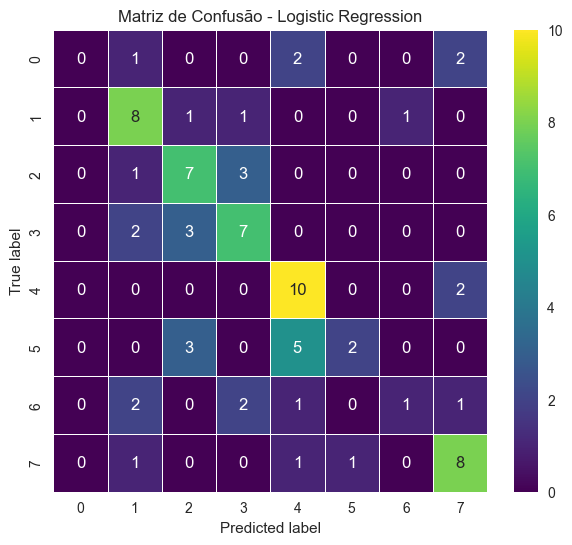

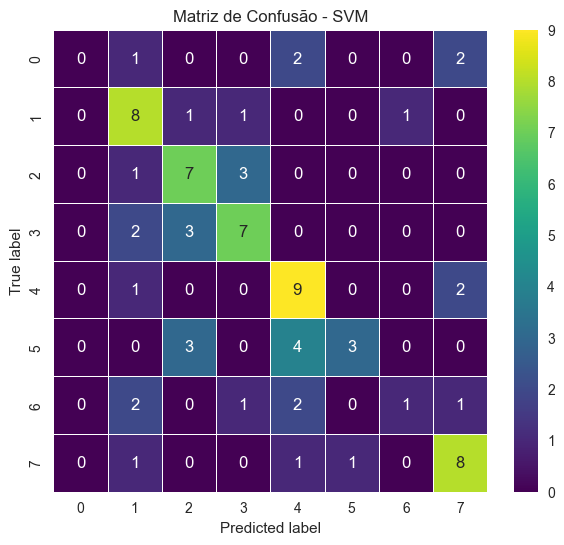

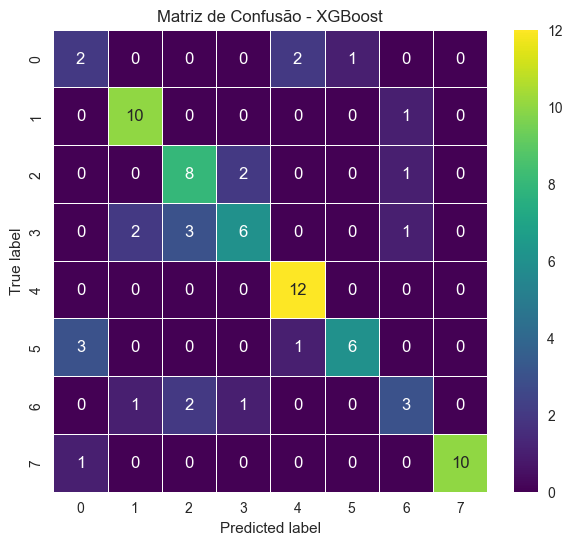

In [ ]:


with open("C:/Animal-crossing-performace/classification-EAD/modelos_classifi/svm_model.pkl", "rb") as f:
    model_log = pickle.load(f)

with open("C:/Animal-crossing-performace/classification-EAD/modelos_classifi/logreg_model.pkl", "rb") as f:
    model_svm = pickle.load(f)

with open("C:/Animal-crossing-performace/classification-EAD/modelos_classifi/xgboost_model.pkl", "rb") as f:
    model_xgb = pickle.load(f)


y_pred_log = model_log.predict(x_test)
y_pred_svm = model_svm.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)


y_proba_log = model_log.predict_proba(x_test)[:, 1]
y_proba_svm = model_svm.decision_function(x_test)   # SVM usa decision_function
y_proba_xgb = model_xgb.predict_proba(x_test)[:, 1]


In [ ]:


def plot_confusion_with_metrics(y_true, y_pred, title, average='macro'):

    # ---- 1. Calcular métricas ----
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average, zero_division=0)
    rec  = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1   = f1_score(y_true, y_pred, average=average, zero_division=0)

    # ---- 2. Criar matriz ----
    cm = confusion_matrix(y_true, y_pred)

    # ---- 3. Plot ----
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", linewidths=.5)

    # Texto com métricas acima do gráfico
    plt.title(
        f"{title}\n"
        f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}",
        fontsize=12,
        pad=20,
    )

    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    plt.show()


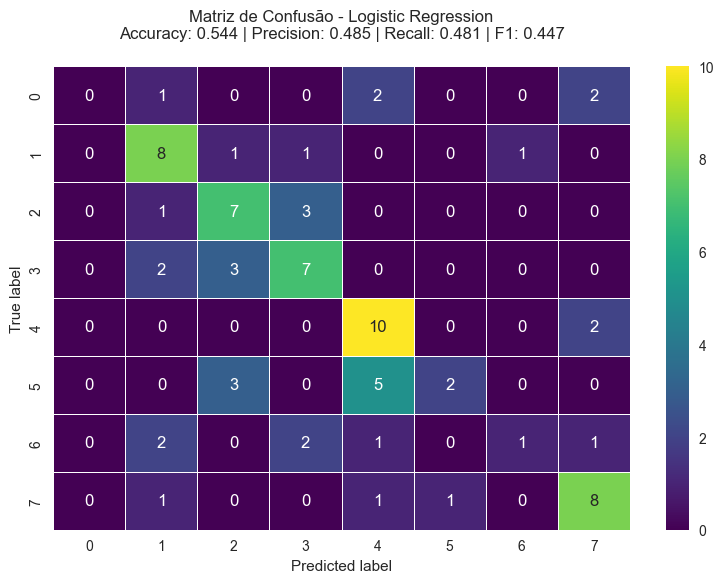

In [ ]:
plot_confusion_with_metrics(y_test, model_log.predict(x_test),
                            "Matriz de Confusão - Logistic Regression")


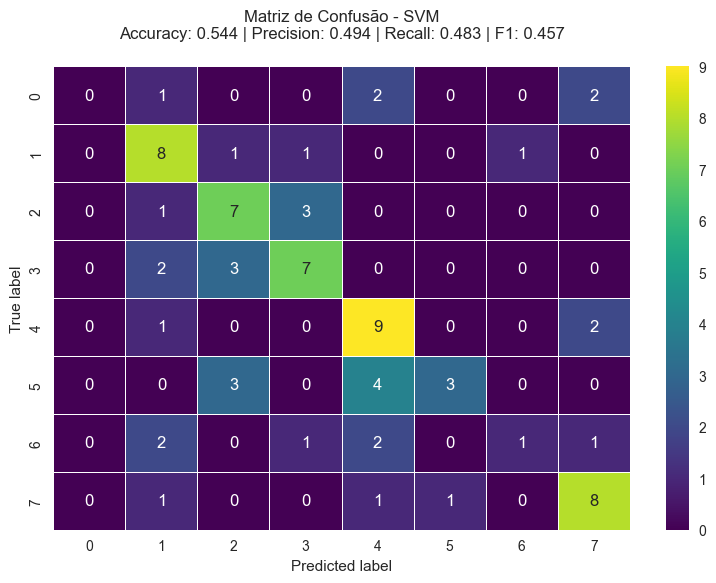

In [ ]:
plot_confusion_with_metrics(y_test, model_svm.predict(x_test),
                            "Matriz de Confusão - SVM")


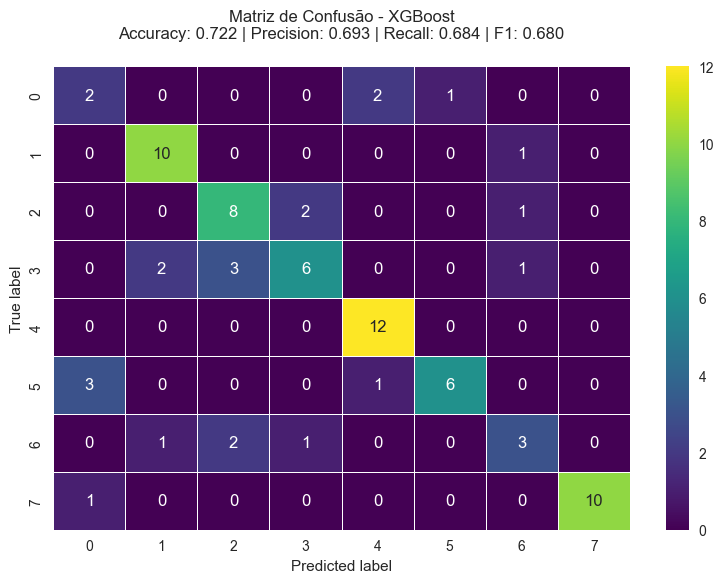

In [ ]:
plot_confusion_with_metrics(y_test, model_xgb.predict(x_test),
                            "Matriz de Confusão - XGBoost")


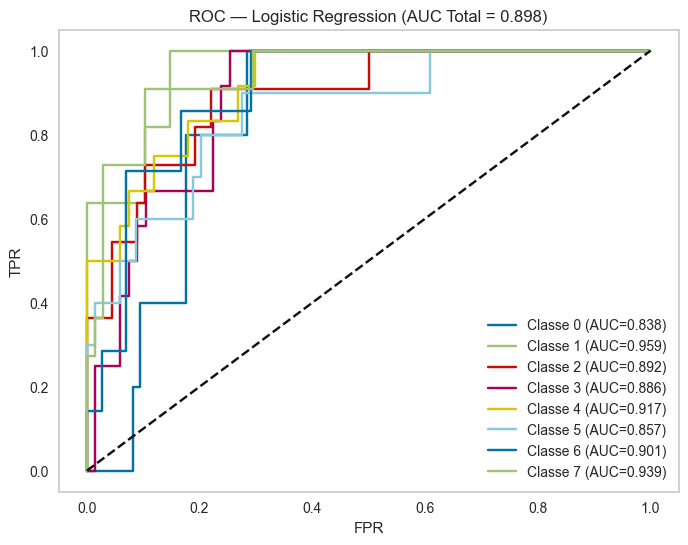

In [ ]:

# binarizar y_test
classes = sorted(list(set(y_test)))
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = len(classes)

# ---------- LOGISTIC ----------
y_proba_log = model_log.predict_proba(x_test)
auc_log_total = roc_auc_score(y_test_bin, y_proba_log, multi_class='ovr')

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_log[:, i])
    plt.plot(fpr, tpr, label=f"Classe {classes[i]} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],"k--")
plt.title(f"ROC — Logistic Regression (AUC Total = {auc_log_total:.3f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()


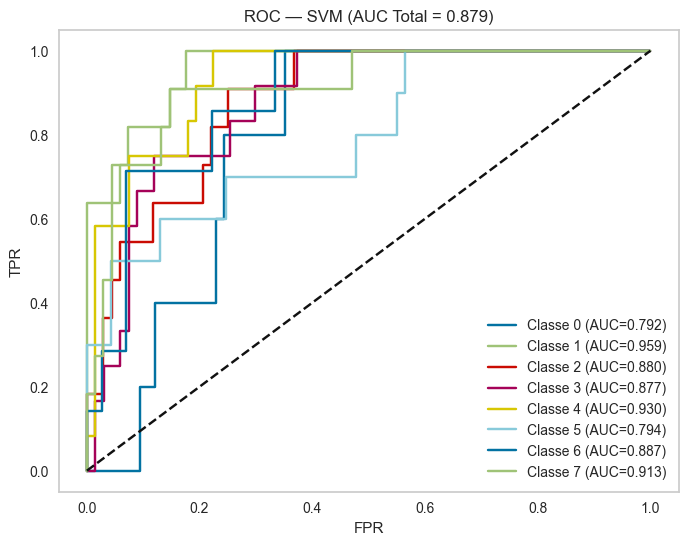

In [ ]:
# ---------- SVM ----------
y_score_svm = model_svm.decision_function(x_test)
auc_svm_total = roc_auc_score(y_test_bin, y_score_svm, multi_class='ovr')

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    plt.plot(fpr, tpr, label=f"Classe {classes[i]} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],"k--")
plt.title(f"ROC — SVM (AUC Total = {auc_svm_total:.3f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()
    

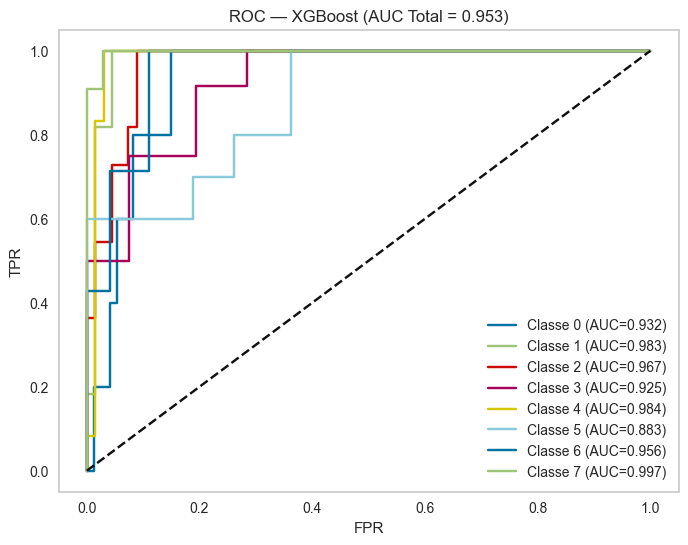

In [ ]:
# ---------- XGBOOST ----------
y_proba_xgb = model_xgb.predict_proba(x_test)
auc_xgb_total = roc_auc_score(y_test_bin, y_proba_xgb, multi_class='ovr')

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_xgb[:, i])
    plt.plot(fpr, tpr, label=f"Classe {classes[i]} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],"k--")
plt.title(f"ROC — XGBoost (AUC Total = {auc_xgb_total:.3f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()


## **Interpretação Final dos Modelos**

A análise dos três modelos — **XGBoost**, **SVM** e **Regressão Logística** — mostra que todos apresentaram **AUC elevado**, indicando boa capacidade de separação entre as classes. No entanto, a **accuracy** e a **precision** ficaram moderadas, o que revela que, apesar de distinguirem bem as classes, ainda cometem erros consideráveis na classificação final.

Esses resultados podem ser explicados principalmente por:

1. **Alta quantidade de classes (8 classes)**  
2. **Baixa quantidade de registros por classe**, o que reduz a capacidade de generalização dos modelos.

Apesar disso, como o objetivo não é alcançar precisão absoluta, mas sim dar suporte à tomada de decisão dos jogadores, os desempenhos obtidos são **adequados para esta etapa do projeto**. Ainda assim, técnicas como **SMOTE**, **data augmentation** ou coleta de novos dados podem melhorar significativamente os resultados.

### **Desempenho por Modelo**

- **XGBoost** — Modelo com melhor desempenho geral  
  - **Accuracy:** ~72%  
  - **AUC Total:** 0.953  
  - Apresenta as curvas ROC mais consistentes e maior separação entre classes.

- **SVM**  
  - **Accuracy:** ~54%  
  - **AUC Total:** 0.879  

- **Regressão Logística**  
  - **Accuracy:** ~54%  
  - **AUC Total:** 0.898  

### **Conclusão**

O **XGBoost** foi o modelo que apresentou os melhores resultados e, por isso, foi selecionado para deploy. Todos os modelos foram armazenados adequadamente para uso futuro e possíveis reavaliações.
